## Gold-Price-Trend-Analysis




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv('/content/XAU_1w_data_2004_to_2024-09-20.csv')
data['Date']=pd.to_datetime(data['Date'])
print("The Shape of the dataset is:\n")
print(data.shape)
print("\nThe first 5 rows:\n")
print(data.head())
print("\nThe last 5 rows:\n")
print(data.tail())
print("\nStructural information of Data:\n")
print(data.info())
print("\nStatistical Information of Data:\n")
print(data.describe())

The Shape of the dataset is:

(1059, 7)

The first 5 rows:

        Date   Time   Open   High    Low  Close  Volume
0 2004-06-06  00:00  384.0  384.8  382.8  384.1     272
1 2004-06-13  00:00  384.3  395.8  381.1  394.3    9692
2 2004-06-20  00:00  394.3  402.8  392.1  401.1    8509
3 2004-06-27  00:00  401.8  404.6  390.3  397.8    9682
4 2004-07-04  00:00  397.8  408.6  388.5  407.1    3507

The last 5 rows:

           Date   Time     Open     High      Low    Close   Volume
1054 2024-08-18  00:00  2509.13  2531.62  2470.74  2511.88  2887375
1055 2024-08-25  00:00  2511.51  2529.01  2493.53  2502.54  2628149
1056 2024-09-01  00:00  2503.36  2529.14  2471.82  2496.89  2707399
1057 2024-09-08  00:00  2497.28  2586.01  2485.52  2578.43  2400240
1058 2024-09-15  00:00  2580.18  2600.00  2546.75  2592.29  1854701

Structural information of Data:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype   

In [ ]:
Null =data.isnull().sum()
print("Null values in each column:\n",Null)
#our data has no null values

Null values in each column:
 Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [ ]:
#As the Time Column Does not have any significance in the dataset, it can be droped!
data =data.drop('Time',axis=1)
data.head()

,Date,Open,High,Low,Close,Volume
0,2004-06-06,384.0,384.8,382.8,384.1,272
1,2004-06-13,384.3,395.8,381.1,394.3,9692
2,2004-06-20,394.3,402.8,392.1,401.1,8509
3,2004-06-27,401.8,404.6,390.3,397.8,9682
4,2004-07-04,397.8,408.6,388.5,407.1,3507


In [ ]:
# Display the yearly data
data['Year']=data['Date'].dt.year
Yearly_data =data.groupby('Year').mean()
print("\nYearly Averages:")
print(Yearly_data)


Yearly Averages:
                    Date         Open         High          Low        Close  \
Year                                                                           
2004 2004-09-15 12:00:00   414.573333   420.076667   408.350000   415.913333   
2005 2005-06-29 12:00:00   444.423077   451.240385   438.684615   445.648077   
2006 2006-07-02 00:00:00   604.696226   619.016981   589.407547   605.745283   
2007 2007-07-04 12:00:00   698.928846   712.484615   687.084615   703.363462   
2008 2008-07-02 12:00:00   874.111538   902.284615   843.567308   871.832692   
2009 2009-07-01 12:00:00   974.067308   994.609038   953.604038   978.145385   
2010 2010-06-30 12:00:00  1225.032308  1246.455000  1205.184231  1230.272308   
2011 2011-06-29 12:00:00  1572.618846  1604.304808  1533.479423  1574.180000   
2012 2012-07-01 00:00:00  1669.813962  1693.327547  1640.972264  1670.633396   
2013 2013-07-03 12:00:00  1410.019615  1431.474038  1374.023846  1400.547885   
2014 2014-07-02 12:00:

In [ ]:
# Display the correlation matrix
corr_matrix=data.corr()
corr_matrix

,Date,Open,High,Low,Close,Volume,Year
Date,1.000000,0.859518,0.857206,0.864184,0.859659,0.606429,0.998805
Open,0.859518,1.000000,0.999180,0.998826,0.998005,0.645060,0.859518
High,0.857206,0.999180,1.000000,0.998775,0.999063,0.644403,0.857247
Low,0.864184,0.998826,0.998775,1.000000,0.999195,0.643004,0.864206
Close,0.859659,0.998005,0.999063,0.999195,1.000000,0.642537,0.859730
Volume,0.606429,0.645060,0.644403,0.643004,0.642537,1.000000,0.607185
Year,0.998805,0.859518,0.857247,0.864206,0.859730,0.607185,1.000000


In [ ]:
cols=['Open','High','Low','Close','Volume']
for col in cols:
  print(col,data[col].skew())

Open -0.05782027482967045
High -0.04780758855302606
Low -0.050970132674240005
Close -0.04518663015591535
Volume 3.1826718824555997


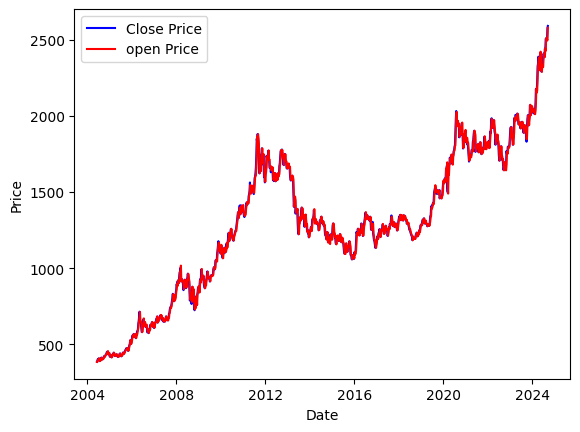

In [ ]:
# Basic Statistical Summary
plt.plot(data['Date'],data['Close'],label='Close Price',color='blue')
plt.plot(data['Date'],data['Open'],label='open Price',color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

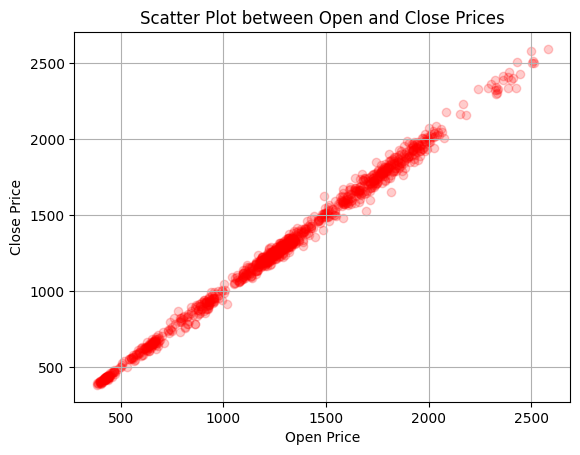

In [ ]:
plt.scatter(data['Open'],data['Close'],alpha=0.2,color='red')
plt.title('Scatter Plot between Open and Close Prices')
plt.xlabel('Open Price')
plt.grid(True)
plt.ylabel('Close Price')
plt.show()

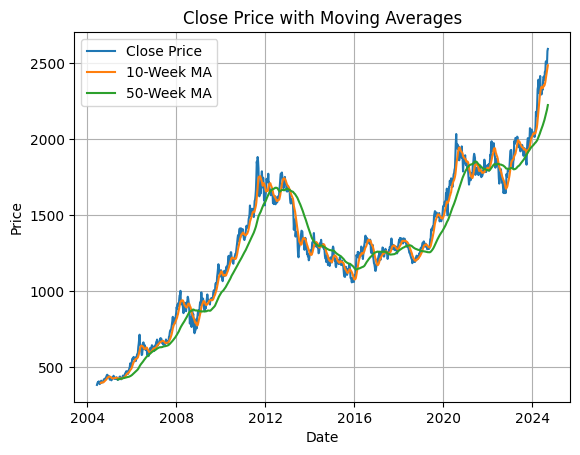

In [ ]:
# Moving Averages(10 & 50-week)
data['avg10'] =data['Close'].rolling(window=10).mean()
data['avg50'] =data['Close'].rolling(window=50).mean()
plt.plot(data['Date'],data['Close'],label='Close Price')
plt.plot(data['Date'],data['avg10'],label='10-Week MA')
plt.plot(data['Date'],data['avg50'],label='50-Week MA')
plt.title('Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

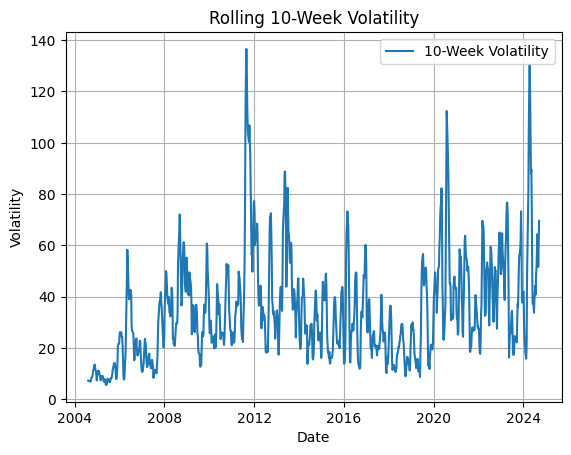

In [ ]:
# Volatility (SD(standard deviation))
data['Volatility']= data['Close'].rolling(window=10).std()
plt.plot(data['Date'],data['Volatility'],label='10-Week Volatility')
plt.title('Rolling 10-Week Volatility')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid(True)
plt.show()

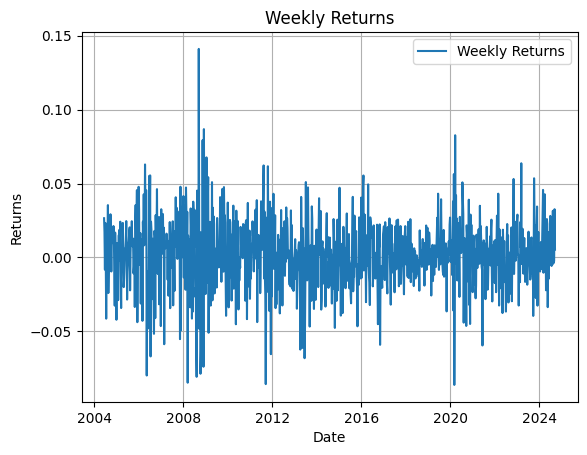

In [ ]:
# Weekly Returns
data['Returns']= data['Close'].pct_change()
plt.plot(data['Date'],data['Returns'],label='Weekly Returns')
plt.title('Weekly Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.grid(True)
plt.legend()
plt.show()

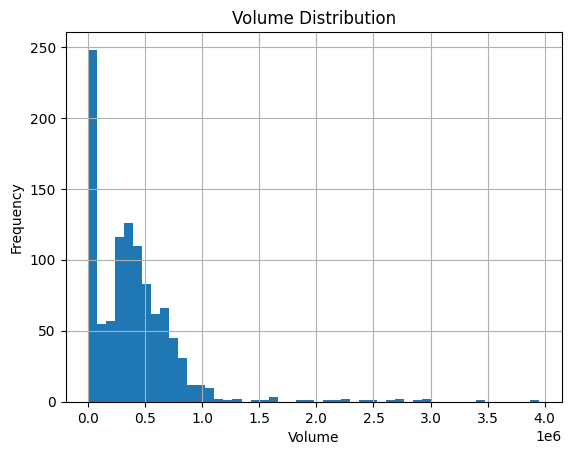

In [ ]:
# Volume (No. of transactions) Distribution Histogram
plt.hist(data['Volume'],bins=50)
plt.title('Volume Distribution')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

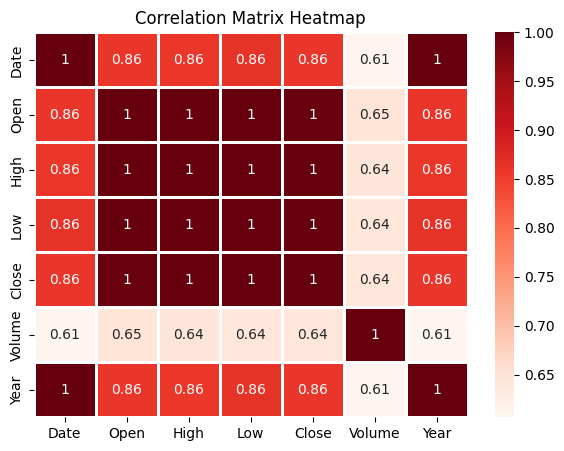

In [ ]:
import seaborn as sns
plt.figure(figsize=(7,5))
sns.heatmap(corr_matrix,annot=True,cmap='Reds',linewidths=1)
plt.title('Correlation Matrix Heatmap')
plt.show()

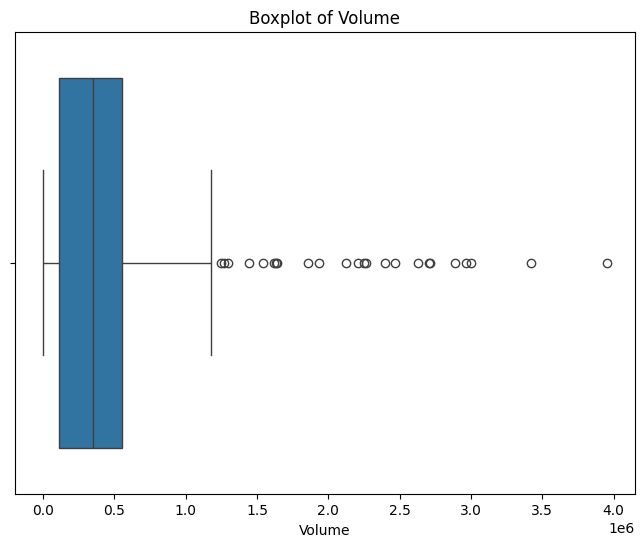

In [ ]:
# Boxplot for No. of transaction distribution(VOulume)
plt.figure(figsize=(8,6))
sns.boxplot(x=data['Volume'])
plt.title('Boxplot of Volume')
plt.show()